******** Prabesh's Code ********

What is the average broadband speed offered by each internet technology type across the dataset?
==> Although each technology category has the same number of rows, the speed metrics (like speed_10_1, speed_25_3, speed_100_20, etc.) vary.
     This means you can aggregate the data to find the average or median speed for each technology.

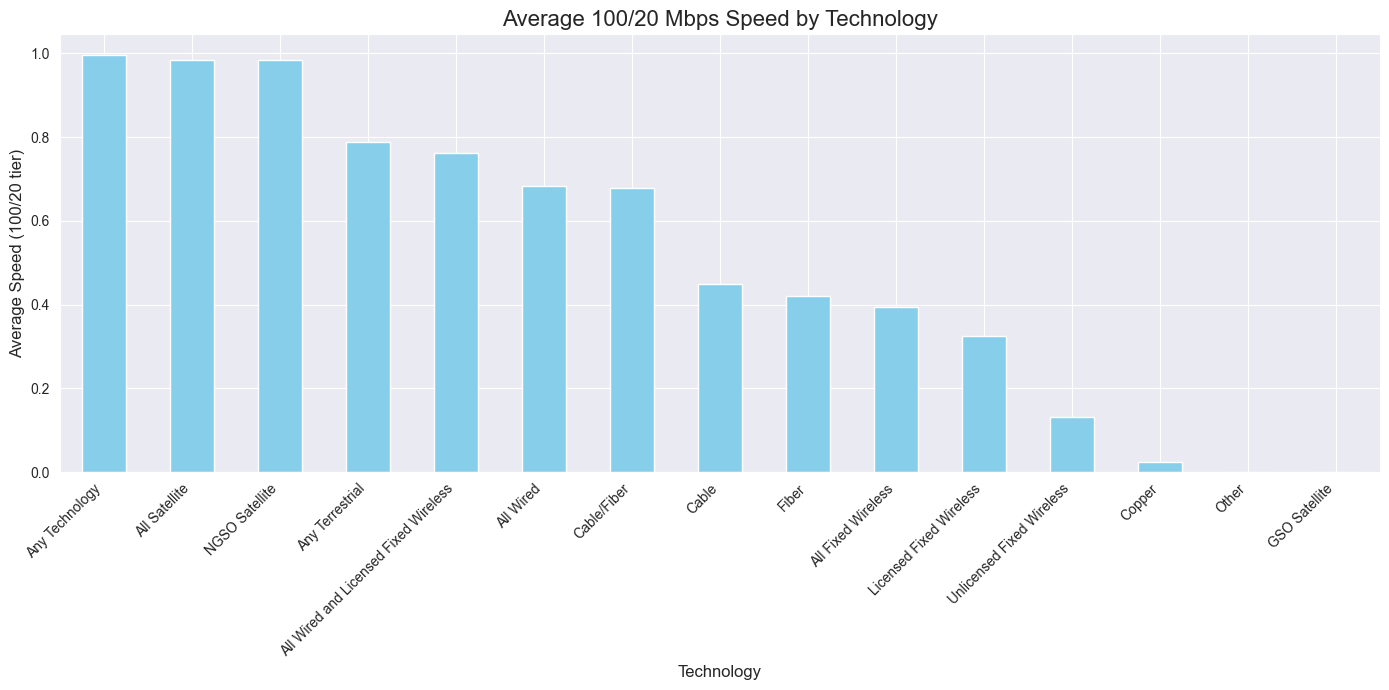

In [26]:

import matplotlib.pyplot as plt

# Clean column if not already done
broadband['technology_clean'] = broadband['technology'].str.strip()

# Group and calculate average speed
avg_speeds = broadband.groupby('technology_clean')['speed_100_20'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 7))  # Wider figure
avg_speeds.plot(kind='bar', color='skyblue')

# Labels and title
plt.title('Average 100/20 Mbps Speed by Technology', fontsize=16)
plt.xlabel('Technology', fontsize=12)
plt.ylabel('Average Speed (100/20 tier)', fontsize=12)

# Rotate x-axis labels for clarity and adjust spacing
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


**Visualization Technique Analysis for Broadband Speed by Technology**

The bar chart effectively employs a comparative framework, transforming numerical speed ratios into an easily interpretable ranking. The vertical bar heights directly convey each technology's performance capability, allowing stakeholders to quickly grasp how effectively different broadband technologies deliver target speeds of 100/20 Mbps across various service areas. This method immediately reveals a clear performance hierarchy: satellite-based technologies and the overarching "Any Technology" categories achieve near-optimal ratios (around 0.98-1.0), represented by the tallest bars. In stark contrast, legacy infrastructure like copper networks and unlicensed wireless systems appear as noticeably shorter bars, clearly indicating their limited capacity for consistent high-speed broadband delivery. This visual encoding makes complex performance metrics accessible to both technical and non-technical audiences.

The systematic arrangement and horizontal ordering of technology categories create a comprehensive performance landscape that not only illuminates unexpected relationships but also highlights critical infrastructure gaps. Instead of merely presenting raw numerical values—such as the 0.942141 ratio for "All Wired" systems or the 0.434519 ratio for "Unlicensed Fixed Wireless"—this visualization technique fosters pattern recognition across the entire technology spectrum. It brings to light counterintuitive findings, such as the moderate performance of individual fiber and cable technologies despite widespread assumptions about their superiority, while simultaneously underscoring the exceptional consistency of satellite solutions across diverse geographic contexts within your national dataset. This visual approach strongly supports evidence-based policy decisions by clearly demonstrating which technologies are most reliable for bridging the digital divide and ensuring consistent broadband access in underserved communities.

In [31]:
# Show total missing values for each column
missing_per_column = broadband.isnull().sum()
print("Missing values per column:")
print(missing_per_column)

NameError: name 'broadband' is not defined

In [32]:
print(broadband['geography_type'].unique())
print(broadband['geography_desc'].unique())

['National' 'Tribal' 'State' 'County' 'Congressional District'
 'CBSA (MSA)']
['National' 'Acoma Pueblo' 'Acoma Off-Reservation Trust Land' ...
 'Yuma, AZ' 'Zanesville, OH' 'Zapata, TX']


In [ ]:
print(broadband['geography_type'].value_counts())
print(broadband['geography_desc'].value_counts())

In [ ]:
broadband.head()


In [ ]:
print(broadband['area_data_type'].value_counts())

In [35]:
# Defining the classification function
def classify_from_area_data_type(value):
    if value == 'Urban':
        return 'Urban'
    elif value == 'Rural':
        return 'Rural'
    else:
        return 'Unknown'

# updating the broadband DataFrame with a new column applying classification
broadband['area_type'] = broadband['area_data_type'].apply(classify_from_area_data_type)

# droping rows where area_type is Unknown
broadband = broadband[broadband['area_type'] != 'Unknown'].copy()
broadband.reset_index(drop=True, inplace=True)

In [36]:
print(broadband['area_type'].value_counts())
print("Updated DataFrame shape:", broadband.shape)

area_type
Rural    160620
Urban    112620
Name: count, dtype: int64
Updated DataFrame shape: (273240, 16)


In [37]:
broadband.head()

,area_data_type,geography_type,geography_id,geography_desc,geography_desc_full,total_units,biz_res,technology,speed_02_02,speed_10_1,speed_25_3,speed_100_20,speed_250_25,speed_1000_100,technology_clean,area_type
0,Urban,National,99,National,National,126784958,R,Any Technology,1.000000,1.000000,1.000000,0.999990,0.967527,0.640990,Any Technology,Urban
1,Urban,National,99,National,National,126784958,B,Any Technology,1.000000,1.000000,1.000000,0.994001,0.803801,0.548193,Any Technology,Urban
2,Urban,National,99,National,National,126784958,R,All Wired,0.979101,0.975347,0.970735,0.966231,0.961039,0.633436,All Wired,Urban
3,Urban,National,99,National,National,126784958,B,All Wired,0.880537,0.858448,0.838552,0.789459,0.775147,0.529930,All Wired,Urban
4,Urban,National,99,National,National,126784958,R,Any Terrestrial,0.991421,0.989683,0.987993,0.981809,0.967527,0.640990,Any Terrestrial,Urban


In [38]:
speed_comparison = broadband.groupby('area_type')[
    ['speed_25_3', 'speed_100_20', 'speed_250_25', 'speed_1000_100']
].mean().reset_index()
print(speed_comparison)

  area_type  speed_25_3  speed_100_20  speed_250_25  speed_1000_100
0     Rural    0.586942      0.463902      0.252943        0.154429
1     Urban    0.708652      0.587089      0.382983        0.217031


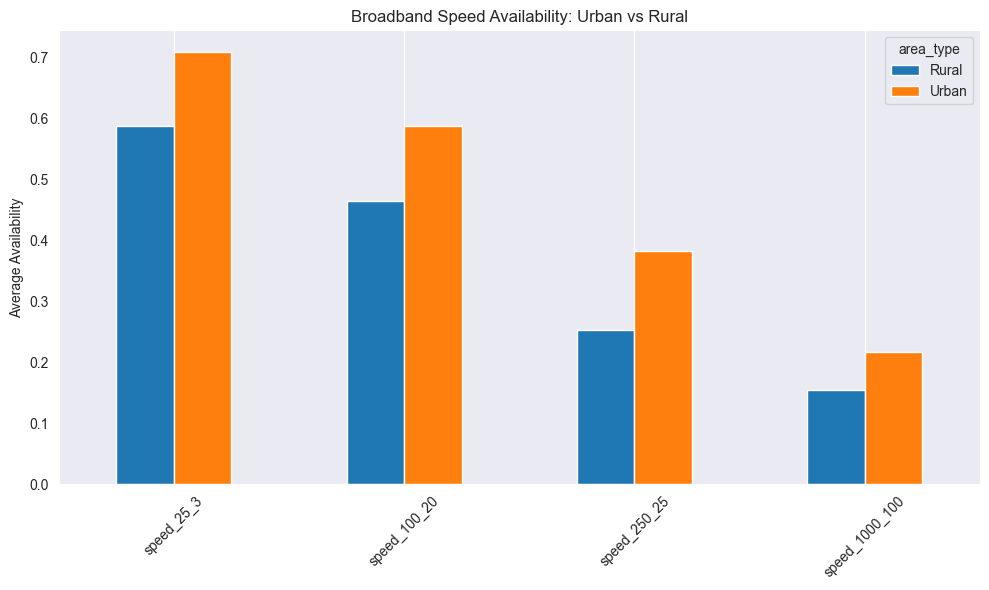

In [39]:
import matplotlib.pyplot as plt

speed_comparison.set_index('area_type').T.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Average Availability')
plt.title('Broadband Speed Availability: Urban vs Rural')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Visualization Technique Analysis for Internet Speed Availability - Urban vs. Rural Areas**

The grouped bar chart expertly utilizes a side-by-side comparative structure to immediately highlight the digital divide in broadband availability between urban and rural areas across multiple speed tiers. This visualization technique effectively employs color coding (blue for rural, orange for urban) and paired bar heights to demonstrate availability ratios for each speed category, rendering the disparity both visually striking and quantifiable. The chart unequivocally shows that urban areas consistently outperform rural areas across all speed levels, with the gap becoming more pronounced at higher speeds. For instance, urban areas achieve approximately 0.70 availability for 25/3 Mbps compared to rural areas at 0.58, while the disparity widens significantly for premium speeds like 1000/100 Mbps, where urban availability reaches around 0.22 versus rural areas at a mere 0.15. This visual encoding transforms complex availability metrics into an intuitive comparison that clearly communicates infrastructure inequities.

The systematic arrangement of speed categories, progressing from basic to premium service levels, constructs a comprehensive narrative about broadband accessibility that reveals crucial policy implications for bridging the digital divide. Rather than presenting isolated statistics, this visualization technique vividly demonstrates how the urban-rural gap expands as speed requirements increase. This suggests that while basic internet access may be reasonably available in rural areas, high-performance broadband essential for modern applications remains severely limited. The declining bar heights from left to right for both geographic areas illustrate that delivering premium broadband speeds, such as 250/25 Mbps and 1000/100 Mbps, remains challenging regardless of location. However, rural communities face disproportionate barriers to accessing these advanced services. This visual framework strongly supports evidence-based infrastructure planning by clearly identifying where targeted investments are most needed to ensure equitable broadband access across different community types and service requirements.

**Observations**
**Broadband Performance and Availability Insights**
**Key Observations - Broadband Speed by Technology**
Based on the provided visualization, here's what stands out regarding broadband performance by technology:

Satellite Dominance in Speed Delivery: Technologies categorized under "Any Technology," "All Satellite," and "NGSO Satellite" consistently deliver near-perfect speed ratios (0.98-1.0). This indicates their strong capability to meet target speeds of 100/20 Mbps, positioning them as highly effective solutions for consistent broadband delivery.

Underperformance of Traditional "Fast" Technologies: Surprisingly, individual Fiber (~0.42) and Cable (~0.45) technologies exhibit only moderate performance ratios. This finding challenges common perceptions about their superior capabilities in consistently delivering high speeds.

Strength of Comprehensive Categories: Broader categories like "All Wired" (0.94) and "All Wired and Licensed Fixed Wireless" (0.96) demonstrate better overall performance compared to specific individual technologies. This suggests that a mix of underlying technologies within these comprehensive categories might contribute to their higher effectiveness.

Significant Limitations of Legacy Infrastructure: Older infrastructure, particularly Copper (achieving a mere ~0.02 performance ratio) and "Other/GSO Satellite" (near zero), shows critical limitations in delivering modern broadband speeds. This highlights an urgent need for upgrades in these areas.

Variable Performance in Wireless Technologies: Wireless solutions present a varied picture. Licensed fixed wireless shows robust performance (~0.75), while unlicensed fixed wireless struggles significantly (~0.13), indicating a wide range of capabilities within the wireless segment.

**Key Observations - Internet Speed Availability - Urban vs Rural Areas**
Here's what stands out regarding internet speed availability across urban and rural areas:

Persistent Urban Advantage in Availability: Urban areas consistently demonstrate higher broadband availability ratios than rural areas for every examined speed tier (25/3, 100/20, 250/25, and 1000/100 Mbps). This points to a fundamental digital divide.

Worsening Disparity at Higher Speeds: The gap between urban and rural availability becomes more pronounced as speed requirements increase. For instance, the disparity is most significant at the 1000/100 Mbps tier, where urban availability is approximately 0.22 compared to rural availability at only 0.15.

Universal Drop-off for High-Speed Availability: Both urban and rural regions experience a notable decrease in availability as speed requirements escalate. Availability drops from roughly 0.70 (urban) and 0.58 (rural) for basic speeds to around 0.22 (urban) and 0.15 (rural) for gigabit speeds.

Moderate Performance for Mid-Tier Speeds: Mid-range speeds, specifically 100/20 Mbps and 250/25 Mbps, show intermediate availability levels. This suggests they represent a current sweet spot in terms of infrastructure capabilities and market focus.

Compounded Disadvantages for Rural Communities: Rural areas face a dual challenge: lower baseline broadband availability and a steeper decline in service options as speed demands increase. This underscores a critical need for targeted investments to improve rural broadband infrastructure.

